# **Set up**

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import os
import random
from PIL import Image
import cv2
import numpy as np
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from tensorflow.keras.applications.vgg16 import preprocess_input
import os
from sklearn.model_selection import train_test_split

In [ ]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Tue Aug 29 03:37:57 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   37C    P8     9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('Not using a high-RAM runtime')
else:
  print('You are using a high-RAM runtime!')

Your runtime has 54.8 gigabytes of available RAM

You are using a high-RAM runtime!


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import zipfile
import shutil
import os


# Define the paths for the zip files and the destination folders
zip_file_9000_path = "/content/drive/My Drive/output_folder_9000.zip"
zip_file_18000_path = "/content/drive/My Drive/output_folder_18000.zip"

output_folder_9000 = "/content/output_folder_9000"
output_folder_18000 = "/content/output_folder_18000"

# Delete existing content of the output folders if they exist
if os.path.exists(output_folder_9000):
    shutil.rmtree(output_folder_9000)

if os.path.exists(output_folder_18000):
    shutil.rmtree(output_folder_18000)



In [ ]:
output_folder_9000 = "/content/"
output_folder_18000 = "/content/"

# Unzip the first zip file to the designated folder
with zipfile.ZipFile(zip_file_9000_path, 'r') as zip_ref:
    zip_ref.extractall(output_folder_9000)

# Unzip the second zip file to the designated folder
with zipfile.ZipFile(zip_file_18000_path, 'r') as zip_ref:
    zip_ref.extractall(output_folder_18000)

print("Unzipping and refreshing completed.")

Unzipping and refreshing completed.


# **Exploratory Data Analsys**

## Class distribution

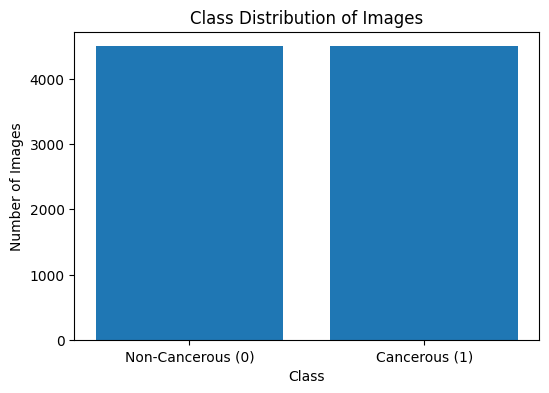

In [ ]:
# Define paths to your class folders
output_subfolder_0 = "/content/output_folder_9000/0"
output_subfolder_1 = "/content/output_folder_9000/1"

# Count the number of images in each class folder
num_class_0 = len(os.listdir(output_subfolder_0))
num_class_1 = len(os.listdir(output_subfolder_1))

# Plotting the class distribution
plt.figure(figsize=(6, 4))
plt.bar(['Non-Cancerous (0)', 'Cancerous (1)'], [num_class_0, num_class_1])
plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.title('Class Distribution of Images')
plt.show()

## Display Images with labels
+ 0 means non-cancerous
+ 1 means cancerous

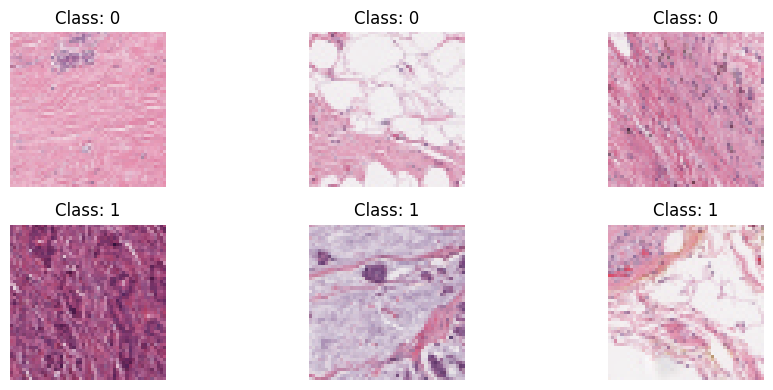

In [ ]:


# Path to the extracted data
extracted_folder_path = '/content/output_folder_9000'

# List of class folders (0 and 1)
class_folders = ['0', '1']

# Number of images to display from each class
images_per_class = 3

# Create a figure to display images
fig, axes = plt.subplots(len(class_folders), images_per_class, figsize=(10, 4))

# Iterate through each class folder
for idx, class_folder in enumerate(class_folders):
    class_path = os.path.join(extracted_folder_path, class_folder)
    image_list = os.listdir(class_path)

    # Choose images randomly
    selected_images = random.sample(image_list, images_per_class)

    # Display selected images
    for col, filename in enumerate(selected_images):
        image_path = os.path.join(class_path, filename)
        image = cv2.imread(image_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

        axes[idx, col].imshow(image)
        axes[idx, col].set_title(f"Class: {class_folder}")
        axes[idx, col].axis('off')

# Adjust layout and display
plt.tight_layout()
plt.show()


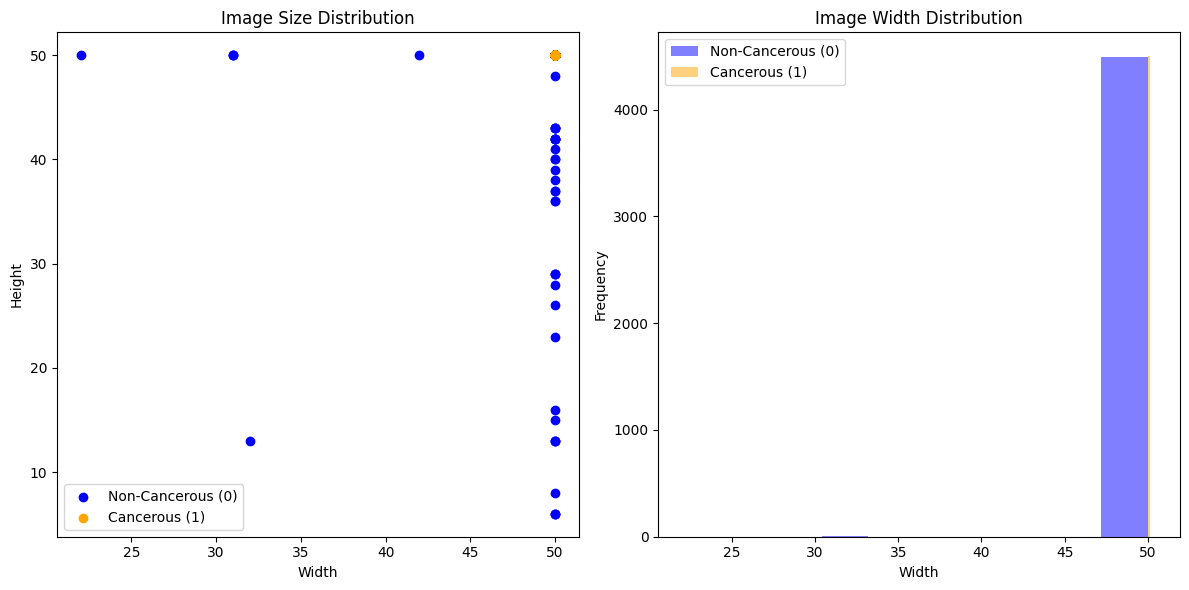

In [ ]:
# Define the path to the class folders
output_subfolder_0 = "/content/output_folder_9000/0"
output_subfolder_1 = "/content/output_folder_9000/1"

# Collect image sizes from both class folders
image_sizes_class_0 = []
image_sizes_class_1 = []

for image_file in os.listdir(output_subfolder_0):
    image_path = os.path.join(output_subfolder_0, image_file)
    with Image.open(image_path) as img:
        width, height = img.size
        image_sizes_class_0.append((width, height))

for image_file in os.listdir(output_subfolder_1):
    image_path = os.path.join(output_subfolder_1, image_file)
    with Image.open(image_path) as img:
        width, height = img.size
        image_sizes_class_1.append((width, height))

# Extract width and height separately
widths_class_0, heights_class_0 = zip(*image_sizes_class_0)
widths_class_1, heights_class_1 = zip(*image_sizes_class_1)

# Plotting the image size distribution
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(widths_class_0, heights_class_0, color='blue', label='Non-Cancerous (0)')
plt.scatter(widths_class_1, heights_class_1, color='orange', label='Cancerous (1)')
plt.xlabel('Width')
plt.ylabel('Height')
plt.title('Image Size Distribution')
plt.legend()

plt.subplot(1, 2, 2)
plt.hist(widths_class_0, color='blue', alpha=0.5, label='Non-Cancerous (0)')
plt.hist(widths_class_1, color='orange', alpha=0.5, label='Cancerous (1)')
plt.xlabel('Width')
plt.ylabel('Frequency')
plt.title('Image Width Distribution')
plt.legend()

plt.tight_layout()
plt.show()

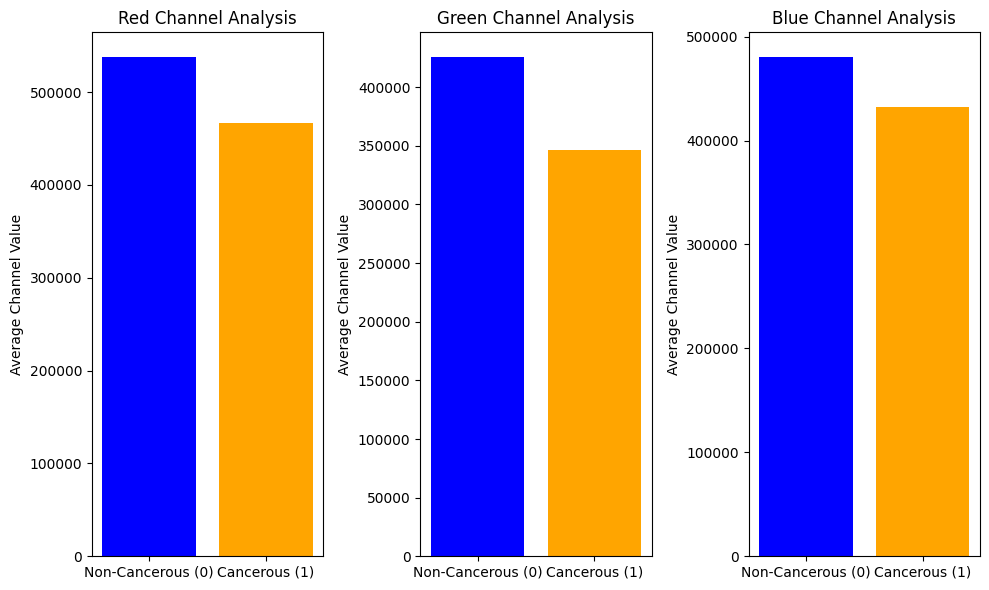

In [ ]:
# Define the path to the class folders
output_subfolder_0 = "/content/output_folder_9000/0"
output_subfolder_1 = "/content/output_folder_9000/1"

# Initialize color channel sum arrays
channel_sums_class_0 = np.zeros(3)  # For RGB channels
channel_sums_class_1 = np.zeros(3)

# Count the number of images in each class folder
num_class_0 = len(os.listdir(output_subfolder_0))
num_class_1 = len(os.listdir(output_subfolder_1))

# Calculate color channel sums for each class
def calculate_channel_sums(class_folder, channel_sums):
    for image_file in os.listdir(class_folder):
        image_path = os.path.join(class_folder, image_file)
        with Image.open(image_path) as img:
            img_array = np.array(img)
            channel_sums += np.sum(img_array, axis=(0, 1))

calculate_channel_sums(output_subfolder_0, channel_sums_class_0)
calculate_channel_sums(output_subfolder_1, channel_sums_class_1)

# Normalize channel sums by the number of images to get average channel values
avg_channel_values_class_0 = channel_sums_class_0 / num_class_0
avg_channel_values_class_1 = channel_sums_class_1 / num_class_1

# Plotting the color channel analysis
colors = ['Red', 'Green', 'Blue']
plt.figure(figsize=(10, 6))
for i, color in enumerate(colors):
    plt.subplot(1, 3, i + 1)
    plt.bar(['Non-Cancerous (0)', 'Cancerous (1)'],
            [avg_channel_values_class_0[i], avg_channel_values_class_1[i]],
            color=['blue', 'orange'])
    plt.ylabel('Average Channel Value')
    plt.title(f'{color} Channel Analysis')

plt.tight_layout()
plt.show()

Interpreting the Plots:

+ If you're observing that the average channel values for Red, Green, and Blue are consistently higher for the non-cancerous class (class 0) compared to the cancerous class (class 1), it suggests that, on average, the non-cancerous images tend to have higher pixel intensity values in these color channels.

+ Conversely, if the average channel values for a specific color channel are consistently higher for the cancerous class (class 1), it would suggest that the cancerous images have higher pixel intensities on average in that particular color channel.

